In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [17]:
data = pd.read_csv('appdata10.csv')

In [5]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [6]:
data.isna().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [8]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data['hour'].head()

0     02:00:00
1     01:00:00
2     19:00:00
3     16:00:00
4     18:00:00
Name: hour, dtype: object

In [18]:
data['hour']=data.hour.str.slice(1,3).astype(int)

In [22]:
data.columns
data.shape

(50000, 12)

In [31]:
num_cols = [ 'dayofweek', 'hour', 'age','numscreens','minigame', 'used_premium_feature','liked']

data2 = data[num_cols]
data2.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

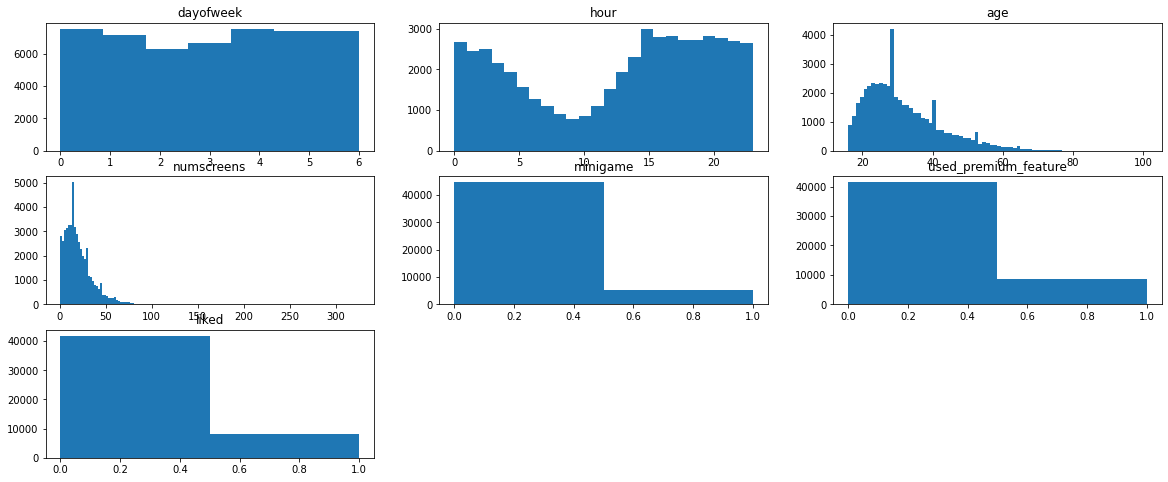

In [35]:
plt.suptitle('Histograms for numerical columns',fontsize=20)
plt.figure(figsize=(20,8))
for i in range(1,data2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(data2.columns.values[i-1])
    vals = np.size(data2.iloc[:,i-1].unique())
    plt.hist(data2.iloc[:,i-1],bins=vals)
plt.show()

<AxesSubplot:title={'center':'Correlation with Enrolled'}>

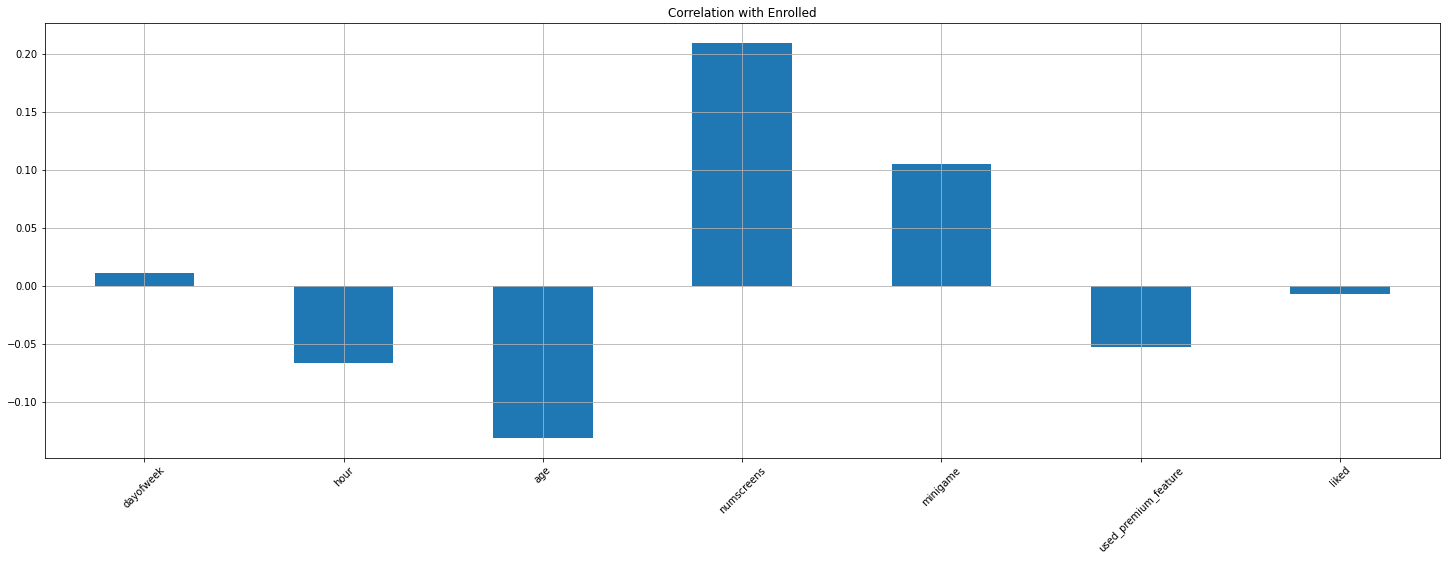

In [39]:
data2.corrwith(data.enrolled).plot.bar(figsize=(25,8),title='Correlation with Enrolled',rot=45,grid=True)

In [40]:
data2.corr()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


In [48]:
data3 = data.copy()
data3['first_open']=[parser.parse(row_data) for row_data in data3['first_open']]
data3['enrolled_date']=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in data3['enrolled_date']]

In [58]:
data3['difference'] = (data3['enrolled_date']-data3['first_open']).astype('timedelta64[h]')
# data3['difference']

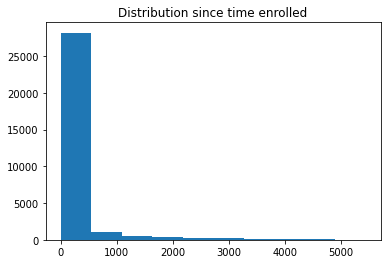

In [59]:
plt.hist(data3['difference'].dropna())
plt.title('Distribution since time enrolled')
plt.show()

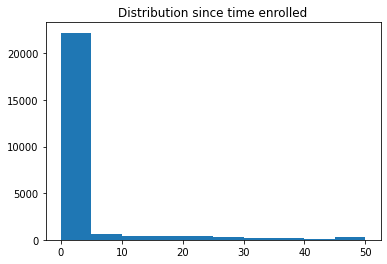

In [61]:
plt.hist(data3['difference'].dropna(),range=[0,100])
plt.title('Distribution since time enrolled')
plt.show()

In [62]:
data3.loc[data3['difference']>48,'enrolled']=0

In [63]:
data3 = data3.drop(['difference','enrolled_date','first_open'],axis=1)

In [68]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [69]:
data3["screen_list"] = data3.screen_list.astype(str) + ','

for sc in top_screens:
    data3[sc] = data3.screen_list.str.contains(sc).astype(int)
    data3['screen_list'] = data3.screen_list.str.replace(sc+",", "")

data3['Other'] = data3.screen_list.str.count(",")
data3 = data3.drop(columns=['screen_list'])

In [70]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
data3["SavingCount"] = data3[savings_screens].sum(axis=1)
data3 = data3.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
data3["CMCount"] = data3[cm_screens].sum(axis=1)
data3 = data3.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
data3["CCCount"] = data3[cc_screens].sum(axis=1)
data3 = data3.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data3["LoansCount"] = data3[loan_screens].sum(axis=1)
data3 = data3.drop(columns=loan_screens)


In [72]:
data3.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [74]:
data3.to_csv('new_appdata10.csv', index = False)